In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
plt.style.use("seaborn")
#loading the data 
df = pd.read_csv(r"EOD-DIS.csv")

In [5]:
print(df.head())

         Date    Open     High       Low   Close     Volume  Dividend  Split  \
0  2017-12-28  108.00  108.050  107.0600  107.77  3477599.0       0.0    1.0   
1  2017-12-27  108.42  108.550  107.4550  107.64  5624037.0       0.0    1.0   
2  2017-12-26  108.49  109.370  107.8900  108.12  3982398.0       0.0    1.0   
3  2017-12-22  109.40  109.685  108.4500  108.67  7377990.0       0.0    1.0   
4  2017-12-21  109.52  111.090  109.1892  109.57  9366706.0       0.0    1.0   

     Adj_Open    Adj_High     Adj_Low   Adj_Close  Adj_Volume  
0  105.021618  105.070239  104.107541  104.797960   3477599.0  
1  105.430035  105.556450  104.491647  104.671545   5624037.0  
2  105.498105  106.353836  104.914651  105.138308   3982398.0  
3  106.383009  106.660149  105.459208  105.673141   7377990.0  
4  106.499700  108.026403  106.178022  106.548321   9366706.0  


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,96.633832,97.284721,95.930802,96.634275,7.624408e+06,0.005954,1.0,90.882806,91.494367,90.222470,90.883165,7.624408e+06
std,13.296325,13.327518,13.221661,13.267403,4.352088e+06,0.070350,0.0,13.500515,13.537531,13.428000,13.475775,4.352088e+06
min,60.920000,61.220000,60.520000,60.930000,2.166034e+06,0.000000,1.0,55.396024,55.668821,55.032294,55.405117,2.166034e+06
25%,89.402500,90.032750,88.920000,89.617500,5.400734e+06,0.000000,1.0,82.357467,82.889778,81.883404,82.571496,5.400734e+06
50%,98.575000,99.175000,98.007500,98.595000,6.658320e+06,0.000000,1.0,93.751049,94.271816,93.018070,93.618734,6.658320e+06
75%,106.945000,107.526250,106.110000,106.940000,8.386674e+06,0.000000,1.0,101.417357,102.050565,100.590383,101.221291,8.386674e+06
max,121.500000,122.080000,120.610000,121.690000,6.090593e+07,1.150000,1.0,113.898573,114.442287,113.064255,114.076686,6.090593e+07


In [7]:
x = df[['High', 'Low','Open','Volume']].values
y = df['Close'].values

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [9]:
regressor =  LinearRegression()

In [10]:
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
print(regressor.coef_)

[ 7.84644480e-01  6.97462403e-01 -4.82403304e-01 -9.50360557e-09]


In [12]:
print(regressor.intercept_)

0.07804153149025694


In [13]:
predict = regressor.predict(x_test)

In [14]:
print(predict)

[115.06001753 110.53110012  87.52723545  93.07449821  95.69280352
 102.48066596 103.6266682  110.02344842  99.86278191  92.50718043
 109.70878114 103.27258689 106.45156811  69.50014409  65.37483041
 108.97065553  97.83201077 112.79765332  96.04225027 106.76626583
 117.69729821 111.44219855  86.93955473  70.15649441  94.85478799
 107.24216468 107.28372963  90.61463453  92.63110479  66.67046852
 108.65693937 112.98240183  71.34229051  86.38526082 101.17686746
 118.57928164 104.78556288 116.24732659 103.66925146 103.55425415
  92.36842457 107.9780052  106.49794547  86.2368547   95.42471241
  89.18579355  62.634258    90.4817985   95.82363199  89.10896021
  80.98081042 100.43182855 112.86019588  93.60456103  97.57779607
  70.69785067  90.31645613 107.2705177   98.45330561  99.1065593
  91.83984771 105.67785307 105.02435822  99.38195483  84.74892641
  90.04350084  85.68346935  79.16528096  95.29237133  80.83462208
 105.96834531 106.70216705 106.23770192 102.52505596 105.95385748
 105.040355

In [15]:
dframe = pd.DataFrame({"Actual" : y_test.flatten() , 'Predicted' : predict.flatten()})

In [16]:
dframe.head(25)

,Actual,Predicted
0,115.04,115.060018
1,109.00,110.531100
2,87.11,87.527235
3,93.49,93.074498
4,95.29,95.692804
5,102.56,102.480666
6,103.44,103.626668
7,109.53,110.023448
8,99.51,99.862782
9,92.49,92.507180


In [17]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,predict))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,predict))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predict)))

Mean Absolute Error :  0.30050158157971163
Mean Squared Error :  0.1895704655093789
Root Mean Squared Error :  0.43539690571865447


In [18]:
graph = dframe.head(20)

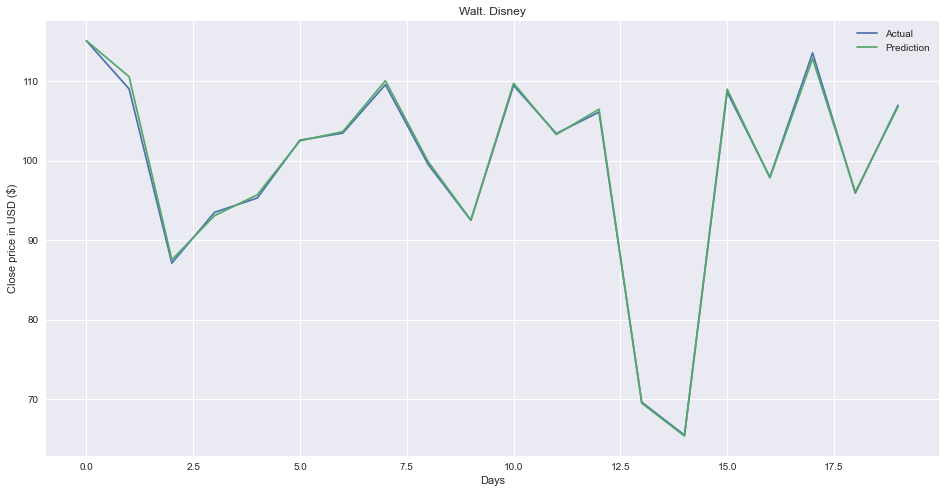

In [20]:
#visualising the dataset
plt.figure(figsize=(16,8))
plt.title("Walt. Disney")
plt.xlabel('Days')
plt.ylabel('Close price in USD ($)')
plt.plot( graph)
plt.legend(['Actual','Prediction'])
plt.show()